## predict gene upregulation/downregulation
- Using Expectation Reflection to infer the gene network and predict gene upregulation/downregulation at the next time point
- initial measurements: $t[0-4]$
- final measurements: $t[1-5]$
- midpoint measurements: $\dfrac{t[0-4] + t[1-5])}{2}$

In [1]:
from functions import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [2]:
def ER_inference(X, y, kf=5, regu=0.005):
    kfold = KFold(n_splits=kf, shuffle=False, random_state=1)
    accuracy_v = []
    
    for (tr_ind, te_ind) in (kfold.split(y)):
        X_tr, y_tr = X[tr_ind], y[tr_ind]
        X_te, y_te = X[te_ind], y[te_ind]
        
#         W_full = np.zeros((X_tr.shape[1], y_tr.shape[1]))
#         h0_full = np.zeros(y_tr.shape[1])
        accuracy = np.zeros(y_tr.shape[1])
        
        for n in range(y_tr.shape[1]):
            h0, w = fit(X_tr, y_tr[:,n], niter_max=100, regu=0.005)
            h_pred = h0 + X_te.dot(w)
            y_pred = np.sign(h_pred)
            accuracy[n] += accuracy_score(y_te[:,n], y_pred, normalize=False)
        accuracy = accuracy/y_te.shape[0]
        accuracy_v.append(accuracy)
    return np.vstack(accuracy_v)

In [ ]:
data_complete = np.loadtxt('../data_complete.txt')
data_init, data_fin, data_midpt, data_deriv = make_data(data_complete, n_bin=6)

names = ["init", "fin", "mid"]
data_list = [data_init, data_fin, data_midpt]
markers = ["o", "x", "+"]

df=list()
for data in data_list:
    X, y = shuffle(data, data_deriv)
    accu = ER_inference(X, y, kf=5, regu=0.005)
    df.append(accu)

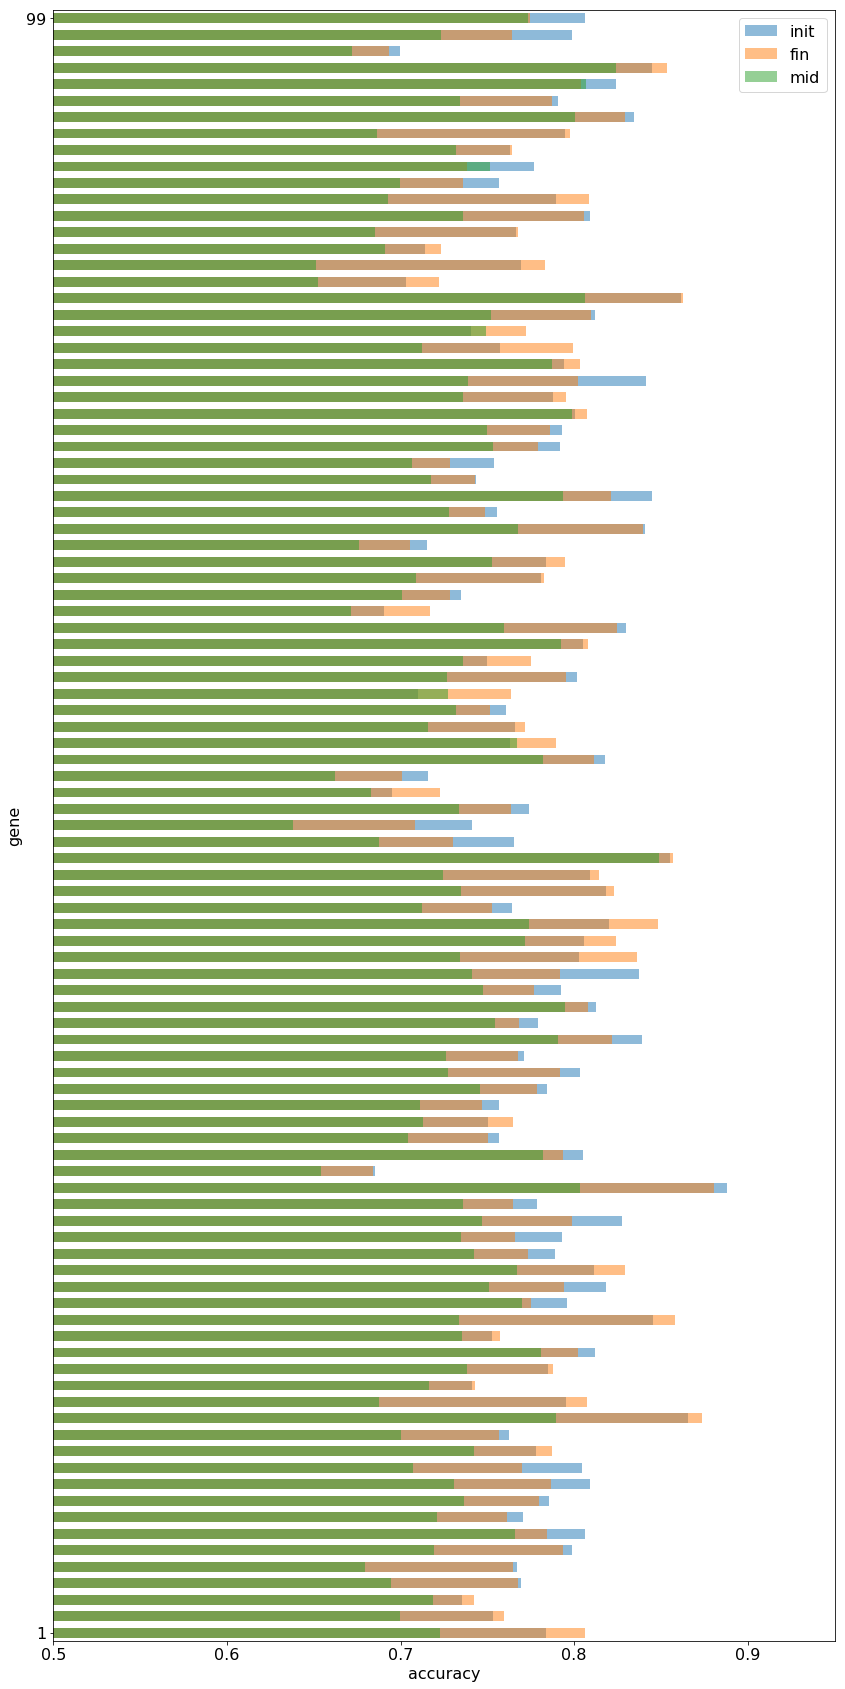

In [10]:
fig = plt.figure(figsize=(14,30))
plt.xlabel('accuracy')
plt.ylabel('gene')
plt.yticks([0, 98*2], ['1','99'])
plt.xticks(np.arange(0.5, 0.95, step=0.1))
plt.ylim([-1,98*2+1])
plt.xlim([0.5,0.95])

for i, pred in enumerate(df):
    pred = pred/
    plt.barh(np.array(range(pred.shape[1]))*2, pred.mean(axis=0), height=1.2, alpha=0.5, label=names[i])
plt.legend(loc=1)
plt.show()

In [27]:
mean=[]
for i, pred in enumerate(df):
    print(names[i], ": ", pred.mean(), pred.std())


init :  0.7841415138552355 0.04057885997543071
fin :  0.7814253093621307 0.03978462257644675
mid :  0.7345694523384554 0.04086154347751521
